In [2]:
# 주성분 분석
import pandas as pd
from sklearn.datasets import load_iris

IRIS = load_iris()
iris = pd.DataFrame(IRIS.data, columns=IRIS.feature_names)
iris["class"] = IRIS.target
iris["class"] = iris["class"].map({0:'Setosa', 1:'Versicolor', 2:'Virginica'})
iris.columns = ['sep_len', 'sep_wid', 'pet_len', 'pet_wid', 'class']
del IRIS
iris

,sep_len,sep_wid,pet_len,pet_wid,class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [3]:
features = ['numeric var 1', 'numeric var 2']
x = iris.drop(columns='class')

#수치형 변수 정규화
from sklearn.preprocessing import StandardScaler
StdScaler = StandardScaler()

StdScaler.fit_transform(x)

pd.DataFrame(x).head()

,sep_len,sep_wid,pet_len,pet_wid
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
pca_fit = pca.fit(x)

print("고유값: ", pca.singular_values_)
print("분산 설명력: ", pca.explained_variance_ratio_)

고유값:  [25.09996044  6.01314738  3.41368064  1.88452351]
분산 설명력:  [0.92461872 0.05306648 0.01710261 0.00521218]


<function matplotlib.pyplot.show(close=None, block=None)>

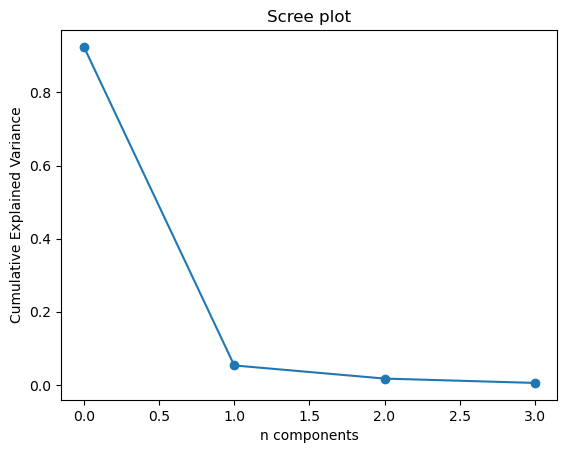

In [9]:
import matplotlib.pyplot as plt

plt.title("Scree plot")
plt.xlabel("n components")
plt.ylabel("Cumulative Explained Variance")
plt.plot(pca.explained_variance_ratio_, "o-")
plt.show

In [10]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
principal_iris = pd.DataFrame(data=principal_components, columns=['pc1', 'pc2'])

principal_iris.head()

,pc1,pc2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


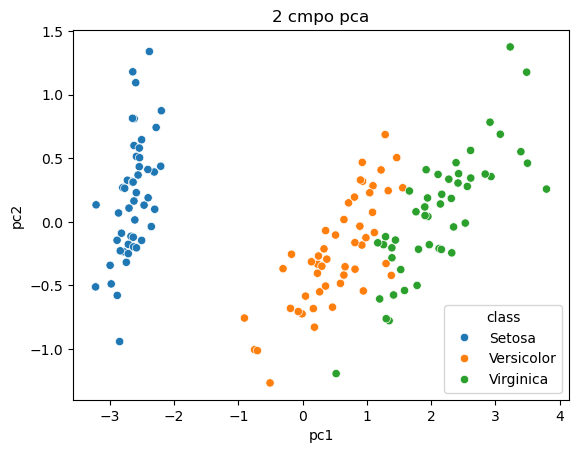

In [12]:
import seaborn as sns

plt.title('2 cmpo pca')
sns.scatterplot(x='pc1', y='pc2', hue=iris['class'], data = principal_iris)
plt.show()